<div style="position: relative; height: 300px; background-image: url('https://www.providencejournal.com/gcdn/authoring/2020/02/21/NPRJ/ghows-PJ-a02463cb-0970-4047-98b5-2cf730e90980-908abb7d.jpeg?width=660&height=348&fit=crop&format=pjpg&auto=webp'); background-size: cover; background-position: center; border-radius: 15px; overflow: hidden;"></div>

## 🛍️ Analyzing Customer Behavior and Sales Trends in E-commerce

In the dynamic landscape of e-commerce, understanding customer behavior and sales trends is crucial for sustained success. Our project aims to meticulously analyze sales data, identify customer segments, and extract insights essential for refining sales strategies and boosting profitability. This endeavor focuses on examining sales patterns, evaluating product performance, and discerning customer preferences to provide actionable recommendations for optimizing sales and driving business growth.

### 📊 Problem Statement
The goal is to dissect sales data and present actionable insights to optimize sales and enhance profitability for our e-commerce venture.

### 🎯 Objectives
- **Sales Trends:** Uncover patterns in sales fluctuations, including peak seasons and regions of high demand.
- **Profitability Analysis:** Determine profitable and unprofitable product categories, regions, and customer segments.
- **Customer Behavior Study:** Analyze average order quantities and values per customer segment, and evaluate the impact of discounts on sales and profitability.
- **Shipping Analysis:** Investigate customer preferences for shipping modes, shipping times, and their influence on satisfaction.

### 🔍 Expected Outcomes
- **Sales Insights:** Comprehensive understanding of sales patterns and regional demand dynamics.
- **Profitability Insights:** Identification of profitable niches and areas for improvement.
- **Customer Behavior Insights:** Deeper comprehension of customer preferences and purchasing habits.
- **Shipping Insights:** In-depth analysis of shipping preferences and their correlation with customer satisfaction.

### Key Questions to Address
1. **Top Selling Products:** What are the top-selling products in the superstore?
2. **Sales Trend Analysis:** What is the sales trend over time (monthly, yearly)?
3. **Revenue and Profit by Category:** Which category of products generates the highest revenue and profit?
4. **Regional Sales Performance:** Which region generates the most sales?
5. **Impact of Discounts and Promotions:** What is the impact of discounts and promotions on sales?
6. **Profit Margin Analysis:** What is the average profit margin for each product category? 
   - *Formula: profit margin = profit / sales*
7. **Product Demand by Sub-category:** Which sub-category of products has the highest demand?


### Loading the Datasets & Libraries

In [120]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

colors = ['#30475E', '#222831', '#F05454', '#DDDDDD']


In [121]:
df = pd.read_csv("../data/Superstore.csv",index_col = 'Row ID',encoding='windows-1252')

### Initial Observations or Trends :

In [122]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [123]:
# Checking the number of rows and columns

num_rows, num_columns = df.shape

print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}\n")

Number of Rows: 9994
Number of Columns: 20



In [124]:
# Creating a table for missing values, unique values and data types of the features

missing_values = pd.DataFrame({'Feature': df.columns,
                              'No. of Missing Values': df.isnull().sum().values,
                              '% of Missing Values': ((df.isnull().sum().values)/len(df)*100)})

unique_values = pd.DataFrame({'Feature': df.columns,
                              'No. of Unique Values': df.nunique().values})

feature_types = pd.DataFrame({'Feature': df.columns,
                              'DataType': df.dtypes})

merged_df = pd.merge(missing_values, unique_values, on='Feature', how='left')
merged_df = pd.merge(merged_df, feature_types, on='Feature', how='left')

merged_df

,Feature,No. of Missing Values,% of Missing Values,No. of Unique Values,DataType
0,Order ID,0,0.0,5009,object
1,Order Date,0,0.0,1237,object
2,Ship Date,0,0.0,1334,object
3,Ship Mode,0,0.0,4,object
4,Customer ID,0,0.0,793,object
5,Customer Name,0,0.0,793,object
6,Segment,0,0.0,3,object
7,Country,0,0.0,1,object
8,City,0,0.0,531,object
9,State,0,0.0,49,object


In [125]:
# Count duplicate rows in train_data
duplicates = df.duplicated().sum()

# Print the results
print(f"Number of duplicate rows : {duplicates}")

Number of duplicate rows : 1


In [126]:
# Having a look at the description of all the numerical columns present in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


## 💡Dataset Description

1. **Row ID:** Unique identifier for each row.
2. **Order ID:** Unique Order ID for each Customer.
3. **Order Date:** Order Date of the product.
4. **Ship Date:** Shipping Date of the Product.
5. **Ship Mode:** Shipping Mode specified by the Customer.
6. **Customer ID:** Unique ID to identify each Customer.
7. **Customer Name:** Name of the Customer.
8. **Segment:** The segment where the Customer belongs.
9. **Country:** Country of residence of the Customer.
10. **City:** City of residence of the Customer.
11. **State:** State of residence of the Customer.
12. **Postal Code:** Postal Code of every Customer.
13. **Region:** Region where the Customer belongs.
14. **Product ID:** Unique ID of the Product.
15. **Category:** Category of the product ordered.
16. **Sub-Category:** Sub-Category of the product ordered.
17. **Product Name:** Name of the Product
18. **Sales:** Sales of the Product.
19. **Quantity:** Quantity of the Product.
20. **Discount:** Discount provided.
21. **Profit:** Profit/Loss incurred.

### Dataset Overview: Key Statistics and Shape

- **Missing Values:** The dataset does not have any missing values in the provided columns.
- **Unique Values:** The dataset encompasses a range of unique values.

### Summary Statistics:

- **Row ID:** The dataset contains 9994 unique IDs with a mean of 4997.5.
- **Postal Code:** The mean postal code is 55190.379, ranging from 1040 to 99301.
- **Sales:** The mean sales is 229.86 Dollars, ranging from 0.44 dollars to 22638.48 dollars.
- **Quantity:** The mean quantity is 3.79, ranging from 1 to 14.
- **Discount:** The mean discount is 15.62 Percent, ranging from 0 Percent to 80 Percent.
- **Profit:** The mean profit is 28.66 dollars, ranging from -6599.98 dollars to 8399.98 dollars.

### Dataset Shape Overview:

- **Complete Data:** 9994 Rows, 21 Columns

This dataset provides comprehensive information about sales transactions, including customer details, product information, and financial data.


### 🧹 Data Preprocessing

In [127]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date']  = pd.to_datetime(df['Ship Date'])

In [128]:
# Maximum value in the 'Order Date' column
latest_order_date = df['Order Date'].max()

# Minimum value in the 'Order Date' column
earliest_order_date = df['Order Date'].min()

print("Earliest Order Date:", earliest_order_date)
print("Latest Order Date:", latest_order_date)


Earliest Order Date: 2014-01-03 00:00:00
Latest Order Date: 2017-12-30 00:00:00


In [129]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day

day_of_week_names = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

df['Order Day of Week'] = df['Order Date'].dt.day_of_week.apply(lambda x: day_of_week_names[x])

## Sales & Profitability Analysis

### Top Selling Products


Top 10 Selling Products:
Product: Canon imageCLASS 2200 Advanced Copier - Sales: $61,599.82
Product: Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind - Sales: $27,453.38
Product: Cisco TelePresence System EX90 Videoconferencing Unit - Sales: $22,638.48
Product: HON 5400 Series Task Chairs for Big and Tall - Sales: $21,870.58
Product: GBC DocuBind TL300 Electric Binding System - Sales: $19,823.48
Product: GBC Ibimaster 500 Manual ProClick Binding System - Sales: $19,024.50
Product: Hewlett Packard LaserJet 3310 Copier - Sales: $18,839.69
Product: HP Designjet T520 Inkjet Large Format Printer - 24" Color - Sales: $18,374.90
Product: GBC DocuBind P400 Electric Binding System - Sales: $17,965.07
Product: High Speed Automatic Electric Letter Opener - Sales: $17,030.31


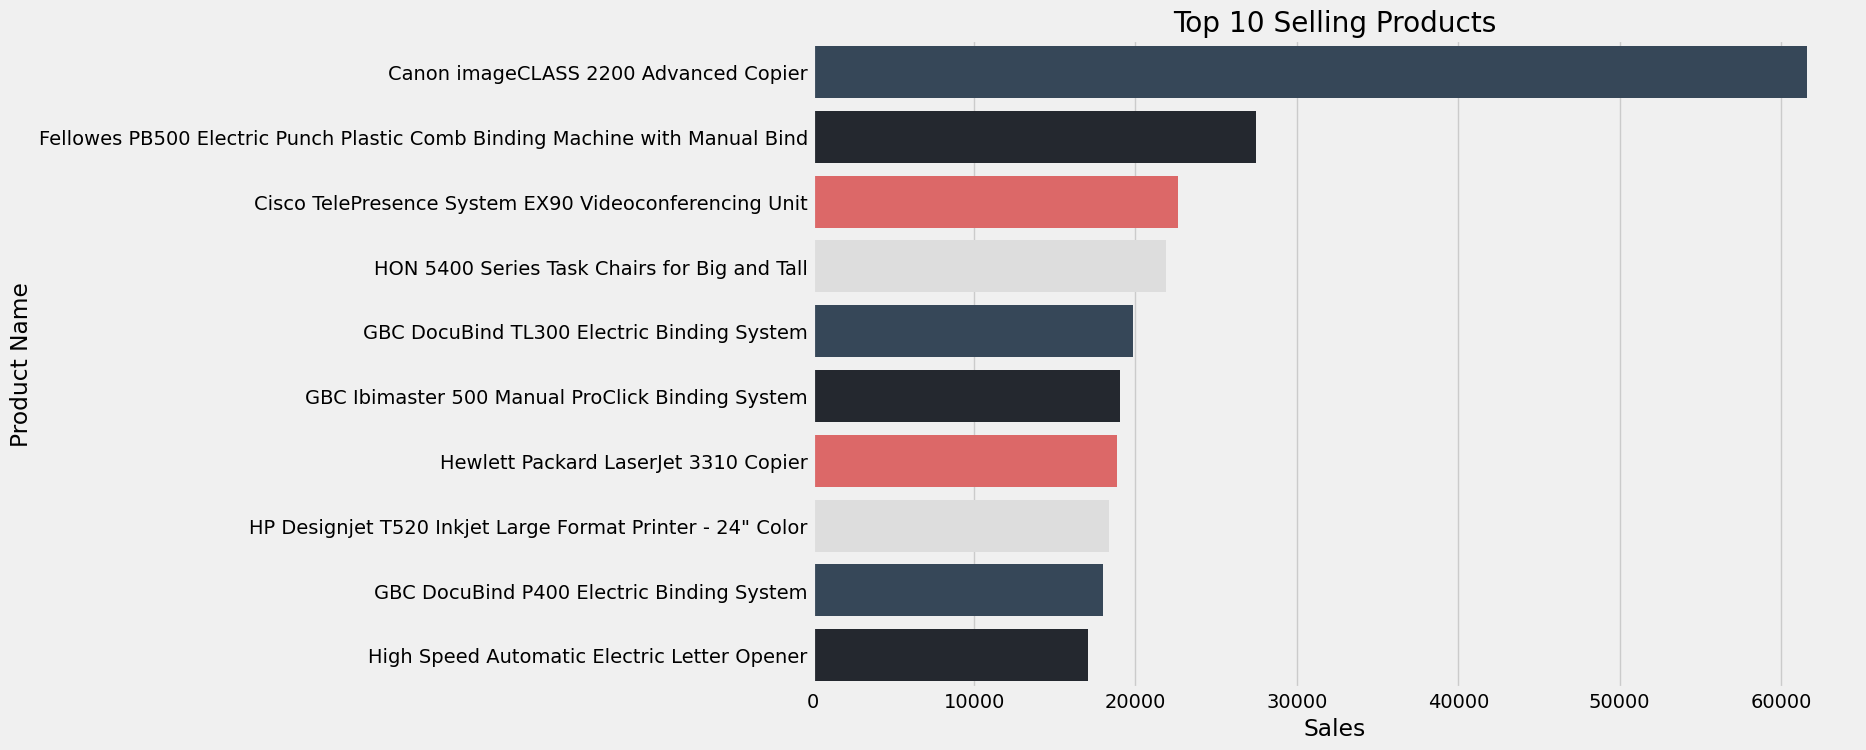

In [103]:
topSellingProducts = df.groupby(['Product ID', 'Product Name'])['Sales'].sum().reset_index()
topSellingProducts = topSellingProducts.sort_values(by='Sales', ascending=False)

# Get top 10 selling products
top10 = topSellingProducts.head(10)

print("Top 10 Selling Products:")
for index, row in top10.iterrows():
    print(f"Product: {row['Product Name']} - Sales: ${row['Sales']:,.2f}")

plt.figure(figsize=(12, 8))
sns.barplot(data=top10, x='Sales', y='Product Name', palette= colors)
plt.title('Top 10 Selling Products')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

### Sales Trend Over Time (Monthly and Yearly)



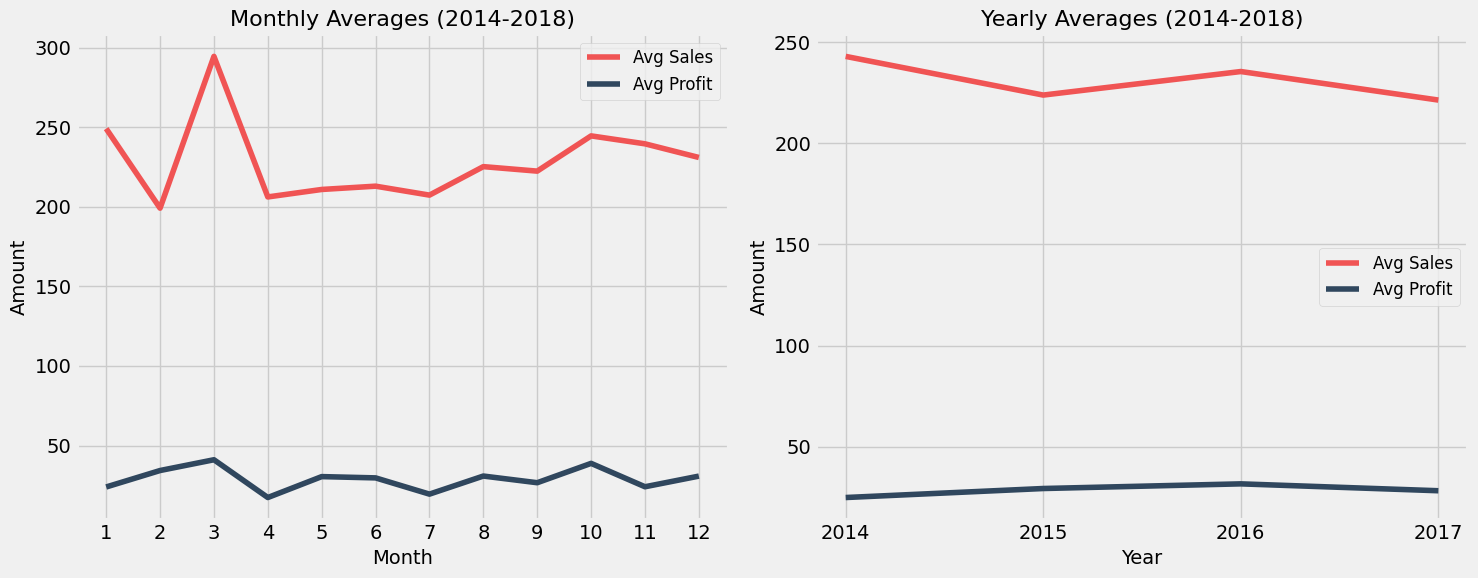

In [104]:
# Chronological ordering
dfLine = df[['Order Date', 'Sales', 'Profit']].sort_values('Order Date')

# Extract month and year
dfLine['Month'] = dfLine['Order Date'].dt.month
dfLine['Year'] = dfLine['Order Date'].dt.year

# Group by month and calculate the mean
dfLineMonth = dfLine.groupby('Month').mean()

# Group by year and calculate the mean
dfLineYear = dfLine.groupby('Year').mean()

fig, axs = plt.subplots(1, 2, figsize=[15, 6])

sns.lineplot(data=dfLineMonth, x=dfLineMonth.index, y='Sales', color='#F05454', label='Avg Sales', ax=axs[0])
sns.lineplot(data=dfLineMonth, x=dfLineMonth.index, y='Profit', color='#30475E', label='Avg Profit', ax=axs[0])
axs[0].set_title("Monthly Averages (2014-2018)", size=16)
axs[0].set_xlabel('Month', fontsize=14)
axs[0].set_ylabel('Amount', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].set_xticks(range(1, 13))

sns.lineplot(data=dfLineYear, x=dfLineYear.index, y='Sales', color='#F05454', label='Avg Sales', ax=axs[1])
sns.lineplot(data=dfLineYear, x=dfLineYear.index, y='Profit', color='#30475E', label='Avg Profit', ax=axs[1])
axs[1].set_title("Yearly Averages (2014-2018)", size=16)
axs[1].set_xlabel('Year', fontsize=14)
axs[1].set_ylabel('Amount', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].set_xticks(dfLineYear.index)

plt.tight_layout()

plt.show()

### Category of Products with Highest Revenue and Profit

Category with highest revenue: Technology with sales of $836,154.03
Category with highest profit: Technology with profit of $145,454.95


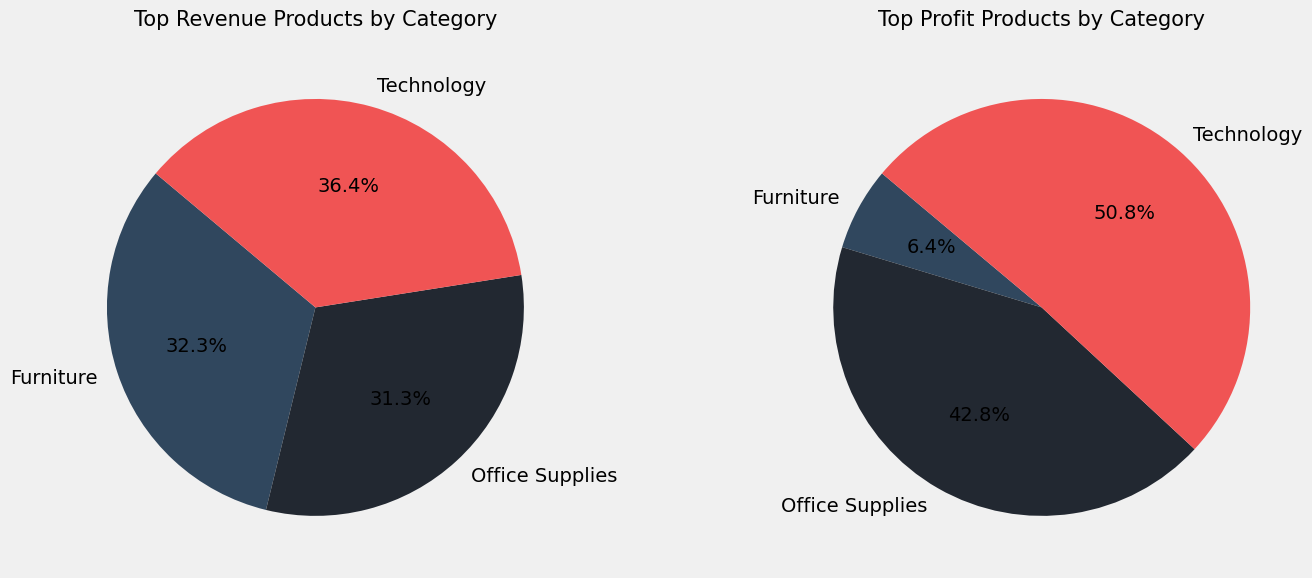

In [65]:
topRevenueProduct = df.groupby('Category')['Sales'].sum().reset_index()
topProfitProduct = df.groupby('Category')['Profit'].sum().reset_index()

categoryRevenueProfit = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
topCategoryRevenue = categoryRevenueProfit.sort_values(by='Sales', ascending=False).iloc[0]
topCategoryProfit = categoryRevenueProfit.sort_values(by='Profit', ascending=False).iloc[0]
print(f"Category with highest revenue: {topCategoryRevenue['Category']} with sales of ${topCategoryRevenue['Sales']:,.2f}")
print(f"Category with highest profit: {topCategoryProfit['Category']} with profit of ${topCategoryProfit['Profit']:,.2f}")

fig, axs = plt.subplots(1, 2, figsize=(15, 6))


axs[0].pie(topRevenueProduct['Sales'], labels=topRevenueProduct['Category'], autopct='%1.1f%%', startangle=140, colors=colors)
axs[0].set_title("Top Revenue Products by Category", size=15, pad=15)

axs[1].pie(topProfitProduct['Profit'], labels=topProfitProduct['Category'], autopct='%1.1f%%', startangle=140, colors=colors)
axs[1].set_title("Top Profit Products by Category", size=15, pad=15)

plt.tight_layout()

plt.show()

### Region Generating the Most Sales

Region with most sales: West with sales of $725,457.82


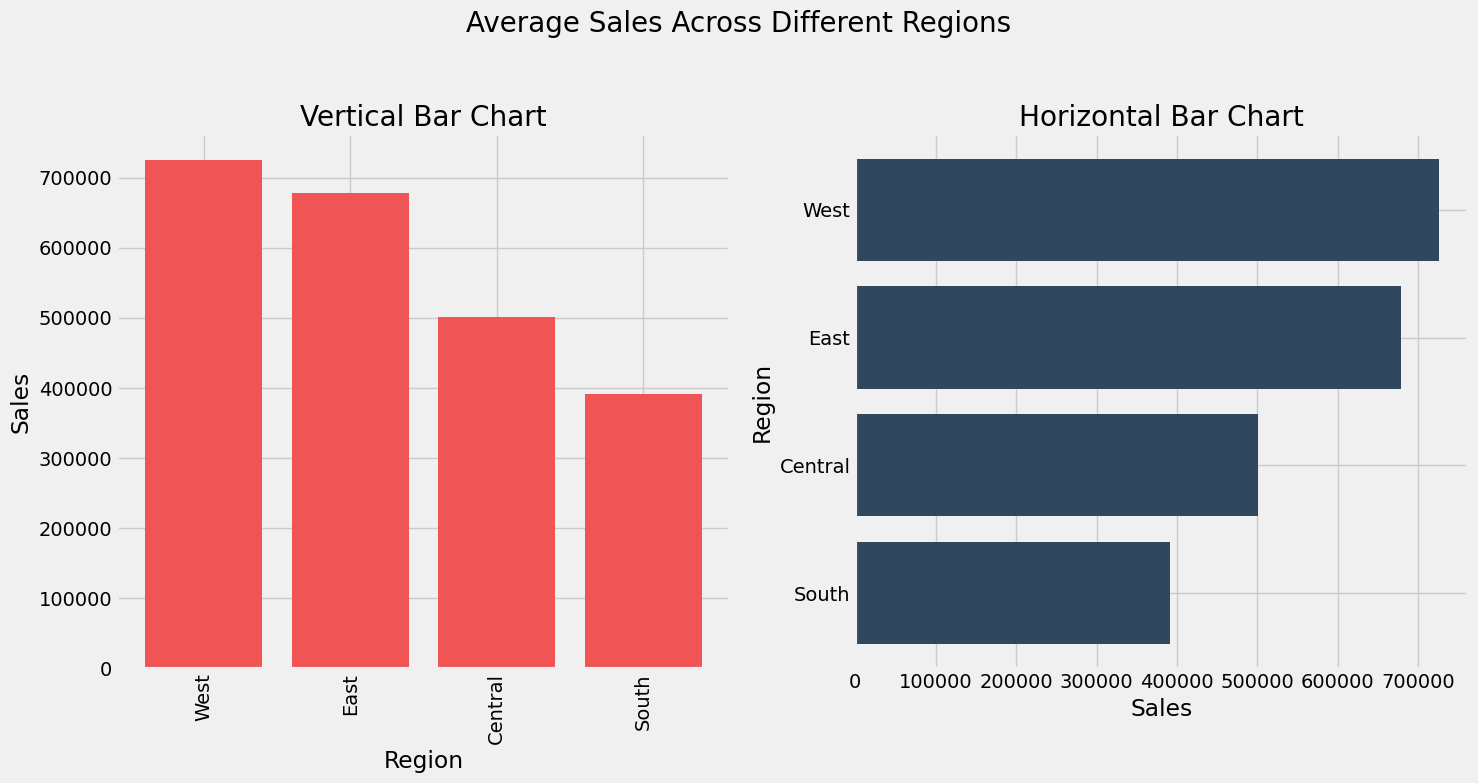

In [78]:
regionSales = df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
topRegion = regionSales.iloc[0]

print(f"Region with most sales: {topRegion['Region']} with sales of ${topRegion['Sales']:,.2f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 8])
fig.suptitle("Average Sales Across Different Regions", size=20)

ax1.bar(regionSales['Region'], regionSales['Sales'], color='#F05454')
ax1.set_xlabel('Region')
ax1.set_ylabel('Sales')
ax1.set_title('Vertical Bar Chart')
ax1.tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees

ax2.barh(regionSales['Region'], regionSales['Sales'], color='#30475E')
ax2.set_xlabel('Sales')
ax2.set_ylabel('Region')
ax2.set_title('Horizontal Bar Chart')
ax2.invert_yaxis() 

fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

### Impact of Discounts and Promotions on Sales



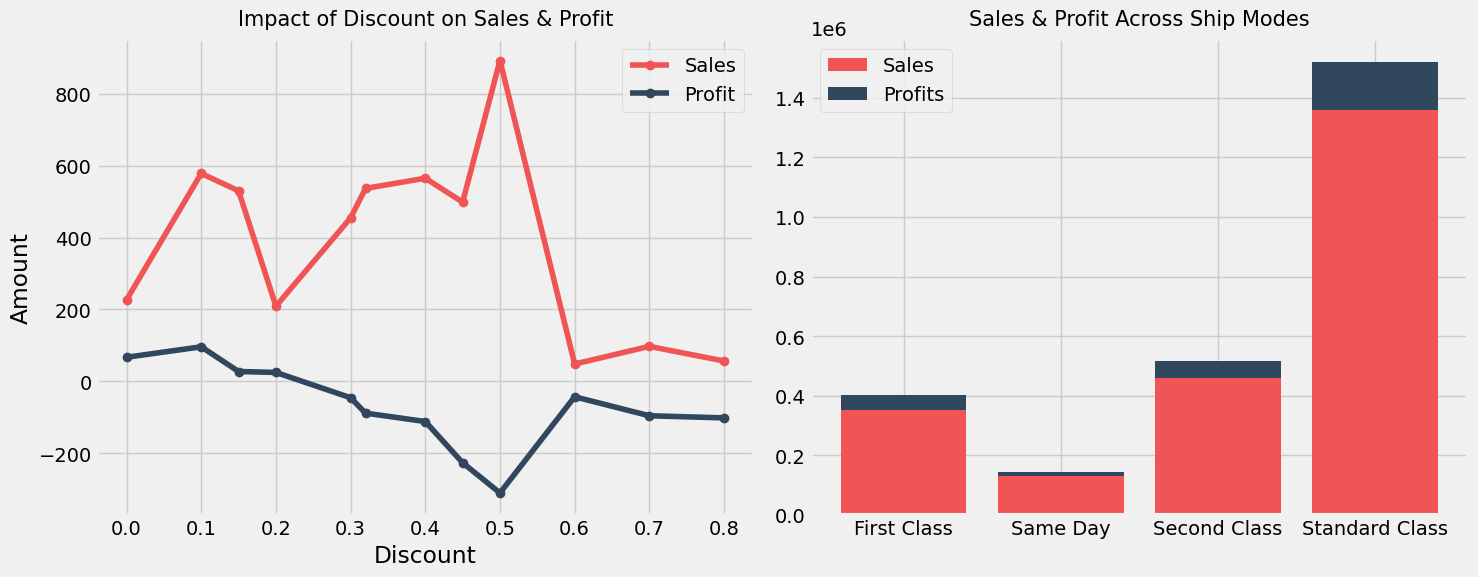

In [81]:
discountsOnSalesAndProfit = df[['Discount','Sales','Profit']]
discountsOnSalesAndProfit = discountsOnSalesAndProfit.groupby(['Discount']).mean().reset_index()

ShipModesOnSalesAndProfit = df[['Ship Mode','Sales','Profit']]
ShipModesOnSalesAndProfit = ShipModesOnSalesAndProfit.groupby(['Ship Mode']).sum().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

ax1 = axs[0]
ax1.plot(discountsOnSalesAndProfit['Discount'], discountsOnSalesAndProfit['Sales'], marker='o', color='#F05454', label='Sales')
ax1.plot(discountsOnSalesAndProfit['Discount'], discountsOnSalesAndProfit['Profit'], marker='o', color='#30475E', label='Profit')
ax1.set_title("Impact of Discount on Sales & Profit", size=15, pad=10)
ax1.set_xlabel("Discount")
ax1.set_ylabel("Amount")
ax1.legend()
ax1.grid(True)

ax2 = axs[1]
ax2.bar(x=ShipModesOnSalesAndProfit['Ship Mode'], height=ShipModesOnSalesAndProfit['Sales'], color='#F05454', label='Sales')
ax2.bar(x=ShipModesOnSalesAndProfit['Ship Mode'], height=ShipModesOnSalesAndProfit['Profit'], bottom=ShipModesOnSalesAndProfit['Sales'], color='#30475E', label='Profits')
ax2.set_title("Sales & Profit Across Ship Modes", size=15, pad=10)
ax2.legend()

plt.tight_layout()
plt.show()


### Average Profit Margin for Each Product Category

In [84]:
df['Profit Margin'] = df['Profit'] / df['Sales']
categoryProfitMargin = df.groupby('Category')['Profit Margin'].mean().reset_index()
categoryProfitMargin.head()

Average Profit Margin for Each Product Category:


,Category,Profit Margin
0,Furniture,0.038784
1,Office Supplies,0.138030
2,Technology,0.156138


### Sub-Category of Products with Highest Demand


In [98]:
# Group by sub-category and category and sum the quantities
subCategoryDemand  = df.groupby(['Category', 'Sub-Category'])['Quantity'].sum().reset_index()

# Sort the sub-categories by total quantity in descending order
sortedSubCategories = subCategoryDemand .sort_values(by='Quantity', ascending=False)

# Get the sub-category with the highest total quantity sold
topSubCategoryDemand  = sortedSubCategories.iloc[0]['Sub-Category']
topCategory = sortedSubCategories.iloc[0]['Category']
topQuantity = sortedSubCategories.iloc[0]['Quantity']

print(f"Sub-Category with highest demand is {topSubCategoryDemand} which is related to {topCategory} with quantity of {topQuantity}")

# Display the results
sortedSubCategories.reset_index().drop(columns=['index']).head(10)



Sub-Category with highest demand is Binders which is related to Office Supplies with quantity of 5974


,Category,Sub-Category,Quantity
0,Office Supplies,Binders,5974
1,Office Supplies,Paper,5178
2,Furniture,Furnishings,3563
3,Technology,Phones,3289
4,Office Supplies,Storage,3158
5,Office Supplies,Art,3000
6,Technology,Accessories,2976
7,Furniture,Chairs,2356
8,Office Supplies,Appliances,1729
9,Office Supplies,Labels,1400
